In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas
from io import StringIO
import networkx as nx
import sympy
import scipy
from sklearn.preprocessing import normalize
from pathlib import Path

In [22]:
TP = "../src/main"
TEST_DIR = "../tests/"

def run_test(test_name: str, niter: int, eps: float): 
    !{TP} {TEST_DIR + test_name} {niter} {eps}

# def absolute_error(test_result: str, expected_result: str):
#     test_table = read_result(test_result)
#     expected_table = read_result(expected_result)
#     return abs(test_table - expected_table)

def read_result_autovalores(test_result: str):
    return pandas.read_csv(TEST_DIR + test_result + '_autovalores.out', names=["autovalores"])

def read_result_autovectores(test_result: str):
    return pandas.read_csv(TEST_DIR + test_result + '_autovectores.out' , names=["autovectores"])

# 1. TESTS METODO

In [3]:
# TEST 1: MATRIZ DE HOUSEHOLDER Y MATRIZ DIAGONAL
n = 10
D = np.diag(range(n, 0, -1))

v = np.ones((D.shape[0], 1))
v = v / np.linalg.norm(v)

# Matriz de Householder
B = np.eye(D.shape[0]) - 2 * (v @ v.T)

M = B.T @ D @ B
print(M)
# GUARDO TXT
#np.savetxt("../tests/householder.txt", M, delimiter=' ')

# CORRO METODO
run_test("householder.txt", 100000, 1e-20)

# CARGO AUTOVALORES Y AUTOVECTORES
l = np.loadtxt("../tests/householder.txt_autovalores.out", dtype='f', delimiter=' ')
v = np.loadtxt("../tests/householder.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(10))

print(M @ v[:, 0])
print(l[0] * v[:,0])

for i in range(len(M)):
    print(i)
    print(np.allclose(M @ v[:, i], l[i] * v[:,i], 1e-6))

[[ 8.20000000e+00 -1.60000000e+00 -1.40000000e+00 -1.20000000e+00
  -1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
  -2.00000000e-01  1.79856130e-16]
 [-1.60000000e+00  7.60000000e+00 -1.20000000e+00 -1.00000000e+00
  -8.00000000e-01 -6.00000000e-01 -4.00000000e-01 -2.00000000e-01
   1.63202785e-16  2.00000000e-01]
 [-1.40000000e+00 -1.20000000e+00  7.00000000e+00 -8.00000000e-01
  -6.00000000e-01 -4.00000000e-01 -2.00000000e-01 -9.35362898e-17
   2.00000000e-01  4.00000000e-01]
 [-1.20000000e+00 -1.00000000e+00 -8.00000000e-01  6.40000000e+00
  -4.00000000e-01 -2.00000000e-01 -6.57807142e-17  2.00000000e-01
   4.00000000e-01  6.00000000e-01]
 [-1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
   5.80000000e+00 -6.57807142e-17  2.00000000e-01  4.00000000e-01
   6.00000000e-01  8.00000000e-01]
 [-8.00000000e-01 -6.00000000e-01 -4.00000000e-01 -2.00000000e-01
  -6.57807142e-17  5.20000000e+00  4.00000000e-01  6.00000000e-01
   8.00000000e-01  1.00000000e+00

In [4]:
# CASO SIMETRICO
A = np.array([
  [ 7,  2,  -3],
  [ 2,  2,  -2],
  [-3, -2,  -2]
])

# GUARDO TXT
np.savetxt("../tests/simetrico.txt", A, delimiter=' ')

# CORRO METODO
run_test("simetrico.txt", 100000, 1e-20)

# CARGO AUTOVALORES Y AUTOVECTORES
l = np.loadtxt("../tests/simetrico.txt_autovalores.out", dtype='f', delimiter=' ')
v = np.loadtxt("../tests/simetrico.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(3))

print(l)
print(v)


print(A @ v[:, 0])
print(l[0] * v[:,0])

for i in range(len(A)):
    print(i)
    print(np.allclose(A @ v[:, i], l[i] * v[:,i], 1e-6))

/bin/sh: ../src/tp: No such file or directory
[ 8.83835   -3.2849522  1.446602 ]
[[ 0.88455707  0.22057717 -0.41097993]
 [ 0.34915668  0.27109465  0.89699346]
 [-0.30927074  0.9369383  -0.16278271]]
[ 7.81802505  3.08596897 -2.73344308]
[ 7.818025  3.085969 -2.733443]
0
True
1
True
2
True


In [5]:
# CASO (A) * (A traspuesta)
AT = A @ A.T
TA = A.T @ A

# GUARDO TXT
np.savetxt("../tests/AT.txt", AT, delimiter=' ')
np.savetxt("../tests/TA.txt", TA, delimiter=' ')

# CORRO METODO
run_test("AT.txt", 100000, 1e-20)
run_test("TA.txt", 100000, 1e-20)

# CARGO AUTOVALORES Y AUTOVECTORES
l_AT = np.loadtxt("../tests/AT.txt_autovalores.out", dtype='f', delimiter=' ')
v_AT = np.loadtxt("../tests/AT.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(3))

l_TA = np.loadtxt("../tests/TA.txt_autovalores.out", dtype='f', delimiter=' ')
v_TA = np.loadtxt("../tests/TA.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(3))

print(l_AT)
print(l_TA)
print("Bingo :)" if np.allclose(l_AT,l_TA) else "Bongo :(")
print("Bingo :)" if np.allclose(v_AT,v_TA) else "Bongo :(")

/bin/sh: ../src/tp: No such file or directory
/bin/sh: ../src/tp: No such file or directory
[78.11643   10.79091    2.0926573]
[78.11643   10.79091    2.0926573]
Bingo :)
Bingo :)


## 2. KARATE CLUB

In [11]:
# CORRER TESTS PARA GENERAR ARCHIVOS DE AUTOVALORES Y AUTOVECTORES

#run_test("karateclub_matriz.txt", 10000, 0.000001)
#run_test("prueba.txt", 10000, 0.000001)
#run_test("laplaciana_karate.txt", 1000000, 1e-20)

In [6]:
eigenvalues_karate = read_result_autovalores("karateclub_matriz.txt")
eigenvectors_karate = read_result_autovectores("karateclub_matriz.txt")
eigenvalues_prueba = read_result_autovalores("prueba.txt")
eigenvectors_prueba = read_result_autovectores("prueba.txt")

# AUTOVAL Y AUTOVEC DE A (NUESTRA FUNCION)
aval_a = np.loadtxt("../tests/karateclub_matriz.txt_autovalores.out", dtype='f', delimiter=' ')
avec_a = np.loadtxt("../tests/karateclub_matriz.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(34))

# AUTOVAL Y AUTOVEC DE LAPLACIANA (NUESTRA FUNCION)
aval_l = np.loadtxt("../tests/laplaciana_karate.txt_autovalores.out", dtype='f', delimiter=' ')
avec_l = np.loadtxt("../tests/laplaciana_karate.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(34))

# VECTOR DE GRUPOS
grupos_vec = np.loadtxt("../tests/karateclub_labels.txt", dtype='f', delimiter=' ')

# MATRIZ DE ADYACENCIA
A = np.loadtxt(TEST_DIR + "karateclub_matriz.txt", dtype='i', delimiter=' ')

In [7]:
# EIGEN DE A (NUMPY)
np_aval_a, np_avec_a = np.linalg.eig(A)
A_nx = nx.from_numpy_array(A)

# LAPLACIANA
L_scipy = nx.laplacian_matrix(A_nx)
L = scipy.sparse.csr_matrix.toarray(L_scipy)

# EIGEN DE L (NUMPY)
np_aval_l, np_avec_l = np.linalg.eig(L)

# CONECTIVIDAD ALGEBRAICA
conectividad = np_avec_l[9]
conectividad

array([-6.02766207e-02, -2.10499460e-02,  2.45280925e-02, -8.13138714e-02,
       -4.16131397e-02, -6.09620466e-04, -8.47560204e-05, -1.17050007e-02,
       -1.71498585e-01,  3.53013370e-02,  9.28008880e-02,  1.61109643e-02,
       -4.06510067e-02, -5.12254601e-04,  1.31195403e-02, -8.99003081e-02,
        6.15901913e-02, -7.37047250e-02,  2.54180623e-01, -8.50926847e-01,
        9.06429781e-02,  3.44546468e-01, -1.00141005e-02,  9.42294259e-02,
       -3.11177938e-02,  3.57317067e-02, -1.17765541e-16,  3.66273449e-02,
       -3.12307998e-15, -2.27203885e-15, -3.58320824e-16,  3.42127521e-15,
       -1.89348105e-15,  1.29126491e-15])

[0.35548349 0.26595387 0.31718939 0.21117408 0.07596646 0.07948058
 0.07948058 0.17095511 0.22740509 0.10267519 0.07596646 0.05285417
 0.08425192 0.2264697  0.10140628 0.10140628 0.02363479 0.09239676
 0.10140628 0.14791134 0.10140628 0.09239676 0.10140628 0.15012329
 0.05705374 0.0592082  0.07558192 0.13347933 0.13107926 0.13496529
 0.17476028 0.19103627 0.30865105 0.37337121]
[-0.36129922 -0.26962665 -0.31880003 -0.21410432 -0.07737478 -0.0810089
 -0.08100892 -0.17305581 -0.22589397 -0.10164014 -0.07737479 -0.05350488
 -0.08552238 -0.22723839 -0.09904562 -0.09904562 -0.02442536 -0.09358074
 -0.09904562 -0.14776331 -0.09904562 -0.09358074 -0.09904562 -0.14695954
 -0.05662283 -0.05860468 -0.07386144 -0.13185705 -0.13002792 -0.13200234
 -0.17298424 -0.18876804 -0.30585188 -0.3708924 ]


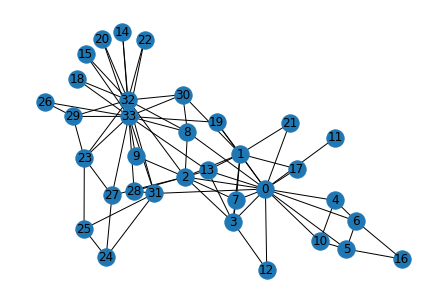

In [8]:
# CENTRALIDAD
centrality = nx.eigenvector_centrality(A_nx)

cen_vec = np.fromiter(centrality.values(), dtype=float)

# sum = 0
# for i in range (len(cen_vec)):
#     sum += cen_vec[i]
# for i in range (len(cen_vec)):
#     cen_vec[i] /= sum
# print(cen_vec)

# GRAFO DE A
nx.draw(A_nx, with_labels=True)

sorted((v, f"{c:0.4f}") for v, c in centrality.items())

print(cen_vec)

print(avec_a[:,0])

In [9]:
# Los autovectores de numpy dan mal

print(np_aval_a[0])
print("")
print (A @ np_avec_a[5])
print("")
print(np_aval_a[0] * np_avec_a[5])

(6.725697727631747+0j)

[ 0.26981342-0.02701661j  0.0785413 +0.00502242j -0.05503426+0.08340887j
  0.28250881+0.j          0.18567084+0.j          0.26076202+0.j
 -0.4002951 +0.j          0.11275947+0.j          0.0010512 +0.03203902j
 -0.03875734+0.j         -0.47538628+0.j          0.07948305+0.j
  0.02047824+0.j          0.12737805+0.j          0.00098554+0.02701661j
  0.00098554+0.02701661j -0.37244443+0.j          0.22514019+0.j
  0.00098554+0.02701661j  0.23975877+0.j          0.00098554+0.02701661j
  0.22514019+0.j          0.00098554+0.02701661j -0.44775385+0.07838646j
 -0.43633096+0.02937566j  0.54983322-0.02701661j -0.01142289-0.00502242j
  0.52470893+0.j         -0.05239038-0.02701661j  0.44938278-0.02937566j
  0.14734323+0.02701661j -0.24661566+0.02701661j  0.73537106-0.02701661j
  0.77599647+0.j        ]

[ 0.53457894+0.j          0.97964594+0.j         -0.35899028+0.j
 -0.39684848+0.j         -0.87551967+0.j         -2.85636371+0.j
  0.35141503+0.j         -0.52592467+0.j

In [10]:
# CORRELACION (ENTRE LAPLACIANA Y VECTOR DE GRUPOS)
# for i in range (34):
#     dot_prod = np.dot(avec_l[:,i], grupos_vec)
#     norm_prod = np.linalg.norm(avec_l[:,i]) * np.linalg.norm(grupos_vec)
#     total = dot_prod / norm_prod
#     print(i)
#     print(total)
#     print("")
    
sum = 0
for i in range (34):
    if (avec_l[32][i] > 0) != (grupos_vec[i]):
        sum += 1
print(sum)

20


## 3. EGO FACEBOOK

[[ True  True False ... False False False]
 [ True  True False ... False False  True]
 [False False  True ... False False False]
 ...
 [False False False ...  True False False]
 [False False False ... False  True False]
 [False  True False ... False False  True]]
umbral: 
5

cantidad de conexiones: 
34369


TypeError: 'AxesSubplot' object is not subscriptable

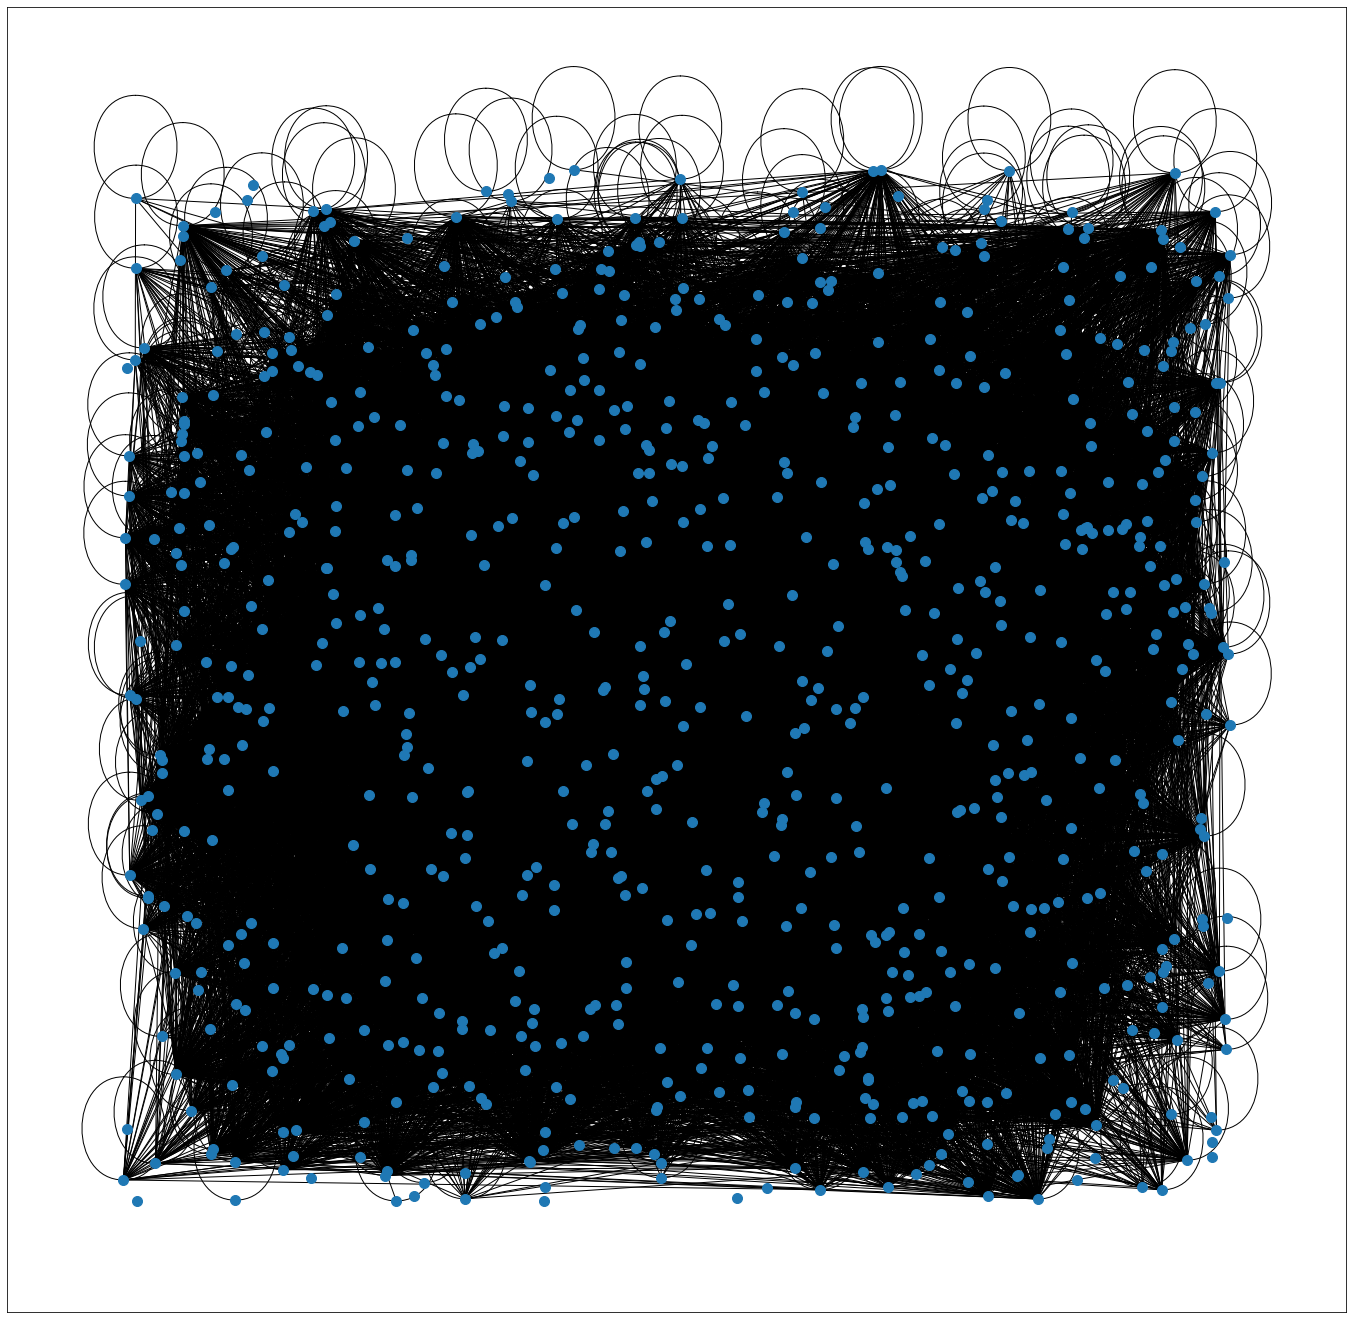

In [14]:
# EJERCICIO 3.1 

# leemos matriz de atributos
input = np.loadtxt(TEST_DIR + "ego-facebook.feat", dtype='i', delimiter=' ')
X = np.delete(input,0,1)

# Transformo matriz en archivo .txt
df = pandas.DataFrame(data=X.astype(float))
df.to_csv("ego-facebook.txt", sep=' ', header=False, float_format='%.2f', index=False)

# Matriz de similaridad
D = X @ X.T

# Calculo matriz de adyacencia y grafo de la red
n = D.shape[0]
x = np.random.rand(n)
y = np.random.rand(n)
W = np.vstack([x,y]).T
pos = {i:p for i,p in enumerate(zip(x,y))}
k = 5
f, axs = plt.subplots(figsize=(24,24))
min_non_0 = np.min(D[np.nonzero(D)])
ee = np.concatenate(([0], np.linspace(min_non_0, D.max() * 0.8, k)))
u = 5

# Construir matriz de adyacencia
A = D > u
print(A)
sum = 0
for i in range(len(A)):
    for j in range(len(A)):
        sum += A[i][j]
print("umbral: ")
print(u)
print("")
print("cantidad de conexiones: ") ## AMISTADES ES / 2
print (sum)

# Construir grafo
G = nx.from_numpy_array(A)
# Plotear red
nx.draw_networkx_nodes(G,pos=pos, node_size=100)
nx.draw_networkx_edges(G,pos=pos)
axs[i].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

In [15]:
# EJERCICIO 3.2 / 3.3

fb_a = np.loadtxt(TEST_DIR + "ego-facebook.edges", dtype='i', delimiter=' ')
l = len(fb_a)

A_fb = np.zeros(shape=(792, 792))

sum = 0
for i in range(l):
    elem_1 = fb_a[i][0] - 2661
    elem_2 = fb_a[i][1] - 2661
    if (elem_1 >= 0 and elem_2 >= 0):
        A_fb[elem_1][elem_2] = 1
        A_fb[elem_2][elem_1] = 1

flatten_A_fb = A_fb.flat
flatten_A = A.flat

sum = 0
for i in range(len(A_fb)):
    for j in range(len(A_fb)):
        sum += A_fb[i][j]
print("cantidad de conexiones: ")
print(sum)


# COMPARACION ELEMENTO A ELEMENTO

sum = 0
for i in range(l):   
    sum += int(flatten_A_fb[i] == flatten_A[i])

print("cantidad de conexiones iguales: ")
print(sum)

cantidad de conexiones: 
27652.0
cantidad de conexiones iguales: 
25020


In [463]:
# EJ 3.2/3.3
# COMPARACION CORRELACION AUTOVALORES

l, v = np.linalg.eig(A)
l_fb, v_fb = np.linalg.eig(A_fb)

print(l)
print("")
# AGREGAR CORRELACION
print(l_fb)

[ 1.11082379e+02+0.00000000e+00j  6.60856740e+01+0.00000000e+00j
  4.76442455e+01+0.00000000e+00j  3.49472962e+01+0.00000000e+00j
  3.34028824e+01+0.00000000e+00j  2.69056592e+01+0.00000000e+00j
  2.32725063e+01+0.00000000e+00j -1.96076917e+01+0.00000000e+00j
  2.20865733e+01+0.00000000e+00j  2.09556231e+01+0.00000000e+00j
  2.04658570e+01+0.00000000e+00j  1.86109111e+01+0.00000000e+00j
 -1.62541575e+01+0.00000000e+00j  1.73609781e+01+0.00000000e+00j
 -1.51872781e+01+0.00000000e+00j  1.65444582e+01+0.00000000e+00j
  1.62101400e+01+0.00000000e+00j  1.51043594e+01+0.00000000e+00j
 -1.35746528e+01+0.00000000e+00j -1.30741155e+01+0.00000000e+00j
  1.41849625e+01+0.00000000e+00j  1.34961981e+01+0.00000000e+00j
 -1.19250947e+01+0.00000000e+00j  1.25285374e+01+0.00000000e+00j
  1.23242427e+01+0.00000000e+00j  1.20169381e+01+0.00000000e+00j
  1.12765603e+01+0.00000000e+00j  1.09903283e+01+0.00000000e+00j
 -1.06865056e+01+0.00000000e+00j -1.05749134e+01+0.00000000e+00j
  1.03399918e+01+0.000000

In [23]:
# EJERCICIO 3.4

# Matriz de covarianza
M_x = (X.T @ X)/(X.shape[0] - 1)
# print(M_x.shape[0])

# Guardo matriz de covarianza en archivo .txt 
df = pandas.DataFrame(data=M_x.astype(float))
df.to_csv(TEST_DIR + "covariance-matrix-fb.txt", sep = ' ', header=False, float_format='%.6f', index=False)

# Obtengo autovalores y autovectores de la matriz de covarianza
#run_test("covariance-matrix-fb.txt", 1000, 0.0001)

# Calculamos autovalores de la matriz de facebook 
eigenvals = np.loadtxt(TEST_DIR + "covariance-matrix-fb.txt_autovalores.out", dtype='f', delimiter=' ')

# Calculamos V (autovectores de M_x)
V = np.loadtxt(TEST_DIR + "covariance-matrix-fb.txt_autovectores.out", delimiter=' ', usecols=range(319))

# Calculamos D
D = np.diag(eigenvals)
print(D)
print(M_x)
res = V @ D @ V.T

Corriendo el programa...
MATRIZ AV!!!!!!!!!     0.00837629
   0.0089044
  0.00723124
  -0.0251019
  0.00262029
   -0.149637
    0.138761
  -0.0483289
  -0.0116759
  0.00890272
 -0.00877987
  0.00605148
 -0.00274375
  0.00771542
  0.00537531
   0.0689732
  0.00461962
    0.010494
 -0.00823401
   0.0116563
  -0.0359331
 -0.00424628
  -0.0179887
  -0.0207753
 -0.00584978
  -0.0078133
 -0.00555843
 -0.00364256
  0.00476629
  0.00292546
  0.00170038
   0.0101754
 -0.00677189
  0.00553915
  0.00430443
   -0.015919
  -0.0223955
  -0.0014232
   -0.019191
   0.0238556
   0.0768905
   0.0319107
  0.00572621
 -0.00273811
  0.00203854
 -0.00254943
   0.0111197
  0.00611399
  0.00156898
  0.00580774
  0.00335619
   0.0030917
  0.00103007
  0.00901154
  0.00185704
   0.0111622
   -0.015166
  -0.0110318
  -0.0036941
  -0.0135787
   0.0024375
 -0.00132091
  0.00115077
 -0.00943778
  -0.0107696
 -0.00611821
   0.0596009
  0.00231671
   0.0149062
 -0.00244492
   -0.122912
 -0.00110774
  -0.0115001
-0.00

 -0.00203165   0.00128386  -0.00616688  0.000634079  0.000724736   0.00354561   0.00817761    0.0137311   -0.0105188   -0.0058464  -0.00669031  -0.00554886   0.00901628    -0.008228   0.00151282    -0.013427  -0.00115175  -0.00662991   -0.0125678 -0.000704043  -0.00933114   0.00639356    0.0125195  -0.00676282    0.0095679   -0.0095218    0.0112176  -0.00624387    0.0179464   -0.0130511   0.00339855    0.0113234   0.00654255    0.0025279    0.0123184    0.0503631  -0.00675082  -0.00212643    0.0016594   -0.0102191    0.0360972   0.00817381   -0.0417666    0.0838677  -0.00461526  -0.00465566    0.0324946  -0.00805519    0.0107517      0.07864   -0.0588376 -0.000687644    0.0394965    0.0225749     0.020651   -0.0116887   -0.0275738    0.0491257   -0.0291823  -0.00663018   -0.0125817   -0.0370283   0.00725519  -0.00567013    0.0311926   -0.0192968   -0.0128689    0.0298633    0.0187629   0.00963324   -0.0412948    0.0138919    -0.017332   -0.0361126   -0.0462452    0.0160035   -0.0193461

 -0.00499859    0.0104299   0.00720694    0.0164112   0.00109278   0.00129833  -0.00866927    0.0107619   0.00732707    0.0202321    0.0169122  -0.00204622    0.0197487   0.00555155  -0.00527892    0.0204627   0.00592494   -0.0168022   -0.0178996    0.0414993     0.013179   -0.0204129  -0.00472192    0.0316715    0.0400451    0.0079687    0.0196511   -0.0341372    0.0221788   0.00229964    0.0141856   0.00343833    0.0044412    0.0289362  -0.00828902    0.0210711    0.0084697    0.0132095   -0.0396181    0.0242795  0.000789902   0.00625957    0.0278923   -0.0109551   -0.0148832    0.0387555    0.0287826    0.0098521   0.00640843   0.00565572     0.028685   -0.0238918    0.0631248   -0.0184738   -0.0958872   -0.0916626    0.0274931    0.0104396     0.044855   -0.0224954   -0.0104499    0.0562943     0.118728    0.0270085    -0.029761    -0.130561  -0.00986681    -0.131198   -0.0228495   -0.0771551  -0.00182158   -0.0284972    0.0140785     0.120413   0.00307429    -0.179385   -0.0660515

 -0.00242594  -0.00329389  0.000312881   0.00809935   0.00637042   -0.0135752  0.000465018   0.00278058   -0.0250673   0.00507493    0.0105298  -0.00696733  -0.00414494 -0.000430047   -0.0015013  -0.00368229  -0.00597795    -0.003185   -0.0115992  -0.00492123    -0.023837   -0.0117274   0.00558457  0.000661784   -0.0011487   -0.0124529   -0.0124725    0.0127869    0.0259527    0.0364942   -0.0105409   -0.0288749   0.00691451   -0.0219653  -0.00228276   -0.0241286    0.0187306    0.0158215    0.0245128   -0.0101534   -0.0140742   -0.0200661  -0.00594769  -0.00328793   -0.0427085     -0.01212   -0.0195759     0.014108  -0.00301459  -0.00572825    0.0424121   0.00329679    0.0248422   -0.0172977   -0.0550115   -0.0230796   -0.0496971   -0.0408031  -0.00340759   0.00443827   -0.0357755  -0.00266756   -0.0139905    0.0280524    0.0174855   0.00636424    0.0120807   0.00682791    0.0076637     0.052746   0.00163929    0.0112737   -0.0249635  -0.00966439  -0.00210201    0.0141671   -0.0353555

  -0.0130004   0.00735608   -0.0248887  -0.00513542  -0.00185336    0.0178495    0.0812069    0.0236254    -0.109858  -0.00322421    0.0261982   -0.0159955     0.086851   -0.0341199    0.0533098   -0.0127025 -0.000560934   -0.0960014  -0.00973677   0.00233044   -0.0464981   -0.0421001    0.0526623    0.0919592   -0.0754489    0.0109771   -0.0574419     0.122549    0.0463413    0.0186991   -0.0524851    0.0380766    0.0853992   -0.0788038    -0.147721    -0.176629   -0.0236947    0.0835735     -0.06062   -0.0374829    -0.148636   -0.0495648     0.131338   0.00101107    0.0269451    0.0494998    -0.299036   -0.0306652    0.0199435   -0.0732221    0.0723203   -0.0989179    0.0815886   -0.0268811    0.0425448    0.0343986   -0.0914366    -0.188343    0.0438447   -0.0935367    -0.144763   -0.0930829   -0.0609633  -0.00737059    0.0695661   -0.0939726   -0.0928306   -0.0378134     -0.14287    0.0494229   -0.0575987    0.0076713    0.0689896    0.0139095    -0.114003    0.0231447    0.0152846

 -0.00162693  0.000308121   0.00579463   -0.0045885  -0.00404457  -0.00261776  -0.00308978   0.00551053   0.00766169   0.00398843   0.00833647   0.00357723    0.0156937   0.00599013   -0.0176472   0.00141822  -0.00697498  -0.00908732   0.00927556    0.0104778   0.00589677   0.00734202  -0.00318247  -0.00272761   -0.0034693   0.00495795   -0.0231356    0.0131563   0.00044756    0.0040286   0.00535411    0.0105589   -0.0041426   -0.0223444   0.00294241    0.0125687   0.00342143  -0.00279603   -0.0029168   0.00945519   0.00233996  0.000783098   -0.0120056  -0.00988238   0.00555493  -0.00440125  0.000187133   0.00887201  -0.00372013  -0.00918134  0.000918765   -0.0048753   0.00217268   0.00503065   0.00275731  -0.00088615  -0.00975894   0.00486317  -0.00626178    0.0055169  -0.00490922   0.00204153    0.0130089  0.000373933  -0.00245308   -0.0111378    0.0079378 -0.000331586  -0.00387065   0.00590952   0.00125054  -0.00404508    0.0160481   0.00657247   0.00616571  9.93954e-05   0.00323294

 -0.00269687  -0.00174747  -0.00606289  0.000187034  -0.00328552  -0.00509693     0.014565   0.00760127  -0.00868604    0.0019911    0.0103115    0.0125169   -0.0197885    0.0106526    -0.019857  -0.00164609    0.0219442   -0.0125559  -0.00657205    0.0125389   -0.0281298  -0.00290699   0.00962608  0.000637467   -0.0189119     0.026839    0.0144134  -0.00239442    -0.013362     -0.01829    0.0256026    0.0143905    0.0177116   0.00144351    0.0215753    0.0443943    0.0327296   -0.0381851    0.0108976   -0.0211862   -0.0421645   0.00898529    0.0237412   -0.0128116    0.0321582   -0.0196655   -0.0126563   0.00147159   -0.0136329    0.0483051    0.0225301    0.0165931   -0.0336195 -0.000341099    0.0112114    0.0314137    -0.111509   -0.0426806    -0.037914   0.00679779   -0.0498787    0.0192871     0.040863    0.0483797   -0.0996819  -0.00814826    0.0223995   -0.0483739    0.0472142    -0.014215   -0.0207804    0.0745349   -0.0466016   -0.0209129    0.0068378     0.050472   0.00328044

   -0.040904   -0.0102972    0.0119408    -0.026442    0.0885569    -0.020511   -0.0037779     0.028012  -0.00918472    -0.015902    -0.116036      0.43928  -0.00870151    -0.252658     0.105567    -0.197226   -0.0716016     0.280252     0.164415      0.19667   -0.0544976   -0.0730121    0.0164132    -0.162681    0.0716379    0.0653718    -0.243367    0.0163561     0.127565   -0.0414224     0.100245    -0.134914     -0.19468     0.260941   -0.0187846    0.0176419    -0.136257    -0.203486    -0.185936   -0.0603673   -0.0891124   -0.0452323    0.0723298   -0.0274199   -0.0809815    0.0557813    -0.116101    0.0290042    0.0614885  -0.00794262    0.0115665   -0.0955745   0.00658648    0.0188985    -0.105515     0.027185     0.019447   0.00636693   -0.0209898    0.0321371    0.0354246   -0.0058727    0.0637379     0.065754   -0.0264486    0.0128333  -0.00853942    0.0490338    0.0317726   -0.0121297     0.018423   0.00464118    0.0486271  -0.00124538   -0.0218767   -0.0126176    0.0131125

 -0.00175892   0.00362752   0.00519862  -0.00296917  0.000820107 -0.000164863   0.00380422   -0.0014453  0.000640099   0.00752506   0.00174982    0.0308515  0.000206228     0.015391  0.000115404  -0.00918617   0.00342986    0.0171151    0.0110837   -0.0136654   -0.0191912   0.00477076   0.00998655    0.0131206   -0.0116305  -0.00366113    0.0276205  -0.00377799   -0.0157525  -0.00294503   0.00346981   -0.0241793     0.020971    0.0101219    0.0151724   0.00671319   0.00453614    0.0019496   0.00353329  -0.00527376  -0.00804734   0.00558482   0.00164978    0.0205432   -0.0091157   -0.0121213  -0.00800321    0.0197376    0.0188411   -0.0283423   -0.0229021   -0.0154305  -0.00177783   -0.0250579   -0.0252074   0.00986064   0.00635175   -0.0203484  -0.00526818    0.0248536   0.00214153  -0.00143024   -0.0310112  -0.00599114  -0.00680207   0.00870361    0.0117717   -0.0169438   -0.0138072    0.0187078    0.0111931    0.0168033   -0.0150787   -0.0127727  -0.00650656   -0.0148743 -0.000740985

 -0.00255088   0.00656748   0.00906536  -0.00537482  -0.00824532 -0.000583897  -0.00838901    0.0101659   -0.0169559    0.0108124   0.00625389    0.0156685  0.000209476    0.0158047  -0.00674386  0.000284891   0.00710227  -0.00445098   -0.0286948   -0.0238126    0.0175612  -0.00156087   -0.0178528   -0.0175776   -0.0011416  -0.00898009    -0.016157  -0.00893362     0.028219    0.0107328   -0.0178227   0.00765646     0.025043   0.00589371   -0.0274703  -0.00251172  -0.00737437   0.00245217  -0.00367275  -0.00791981    0.0192251   0.00372189    0.0391024   0.00105915    0.0126132     0.003155    0.0261824   -0.0104164  -0.00264338   0.00803386    -0.036567  -0.00577578   -0.0210907   -0.0204477   0.00713562    0.0055411   0.00270026   -0.0274559    0.0741425   -0.0241123    0.0653329   -0.0465593    0.0114722    0.0473801   -0.0639143    0.0113381    -0.048505    0.0409766   -0.0118626   -0.0250291   -0.0176485   0.00226429    0.0332226    -0.059531    0.0352439    0.0257411   0.00453649

[[ 2.9503965e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  4.5002970e-01  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  3.5311845e-01 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 ...
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.0289501e-05
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  -1.9057899e-05  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00 -1.8398399e-05]]
[[0.00252845 0.         0.         ... 0.         0.         0.        ]
 [0.         0.00505689 0.         ... 0.         0.         0.        ]
 [0.         0.         0.01643489 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.02654867 0.         0.        ]
 [0.         0.         0.         ... 0.         0.01390645 0.        ]
 [0.         0.         0.    

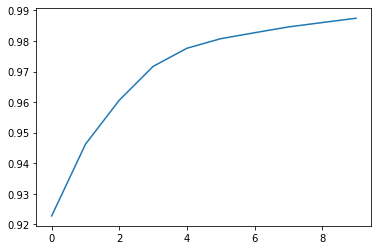

In [27]:
from sklearn.decomposition import PCA

pca = PCA(10).fit(M_x)
plt.plot(np.cumsum(pca.explained_variance_ratio_));

In [28]:
Z = pca.transform(X)

AttributeError: 'AxesSubplot' object has no attribute 'flatten'

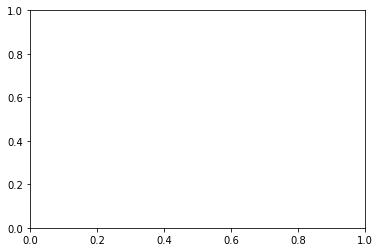

In [29]:
f, axs = plt.subplots(1,1)
for i, ax in enumerate(axs.flatten()):
  ## 
  ax.imshow(np.sum((np.outer(Z[i], np.array([1]*2576)) * pca.components_ ), axis=0).reshape(h,w), cmap=plt.cm.gray);
  ax.axis('off')
plt.tight_layout()
pca.components_.shape